<a href="https://colab.research.google.com/github/MayankChoudhary1/mankibaats-/blob/main/Image_Similarity_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/r87g7fgvji4w6fc/animal_dataset.zip?dl=0

--2021-11-14 04:32:57--  https://www.dropbox.com/s/r87g7fgvji4w6fc/animal_dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/r87g7fgvji4w6fc/animal_dataset.zip [following]
--2021-11-14 04:32:57--  https://www.dropbox.com/s/raw/r87g7fgvji4w6fc/animal_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbdbb17d7fd25af4a2ea47be02b.dl.dropboxusercontent.com/cd/0/inline/BZ7KC2yLcPdZwUQvCB29l09btzBtYmfuuz3QdXmlZ9Rl-X3h7BLeSQxUXQrZRWrfSglSEPR3w0QJwQlNz590cdJ1tOyb0XgEP1yAqnW18mJ98bWIhZgAA7D0ZbPP2Q641dq859yKFMPMH-1qVi9o3wVv/file# [following]
--2021-11-14 04:32:57--  https://ucbdbb17d7fd25af4a2ea47be02b.dl.dropboxusercontent.com/cd/0/inline/BZ7KC2yLcPdZwUQvCB29l09btzBtYmfuuz3QdXmlZ9Rl-X3h7BLeSQxUXQrZRWrfSg

In [2]:
!unzip animal_dataset.zip?dl=0

Archive:  animal_dataset.zip?dl=0
   creating: dataset/
  inflating: dataset/3604.jpg        
  inflating: dataset/3487.jpg        
  inflating: dataset/2902.jpg        
  inflating: dataset/1484.jpg        
  inflating: dataset/1175.jpg        
  inflating: dataset/246.jpg         
  inflating: dataset/3618.jpg        
  inflating: dataset/3763.jpg        
  inflating: dataset/2436.jpg        
  inflating: dataset/3248.jpg        
  inflating: dataset/1662.jpg        
  inflating: dataset/4282.jpg        
  inflating: dataset/2351.jpg        
  inflating: dataset/4385.jpg        
  inflating: dataset/2380.jpg        
  inflating: dataset/4651.jpg        
  inflating: dataset/2830.jpg        
  inflating: dataset/1846.jpg        
  inflating: dataset/1807.jpg        
  inflating: dataset/1536.jpg        
  inflating: dataset/2977.jpg        
  inflating: dataset/120.jpg         
  inflating: dataset/1103.jpg        
  inflating: dataset/1985.jpg        
  inflating: dataset/1706.jpg   

In [3]:
!ls

'animal_dataset.zip?dl=0'   dataset   drive   sample_data


In [4]:
import os
fol = os.listdir('dataset')

In [5]:
type(fol)

list

In [6]:
from keras.preprocessing import image
images = []
for i in fol:
  im = image.load_img('dataset/'+i,target_size=(128,128,3))
  im_array = image.img_to_array(im)
  images.append(im_array)

In [7]:
len(images)

4738

In [8]:
import numpy as np
data = np.array(images)

In [9]:
data = data/255
data.shape

(4738, 128, 128, 3)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
data_train,data_test = train_test_split(data,test_size=0.15)
data_train.shape,data_test.shape

((4027, 128, 128, 3), (711, 128, 128, 3))

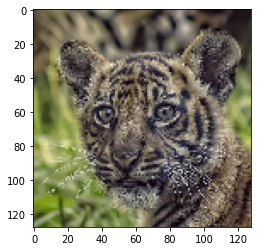

In [12]:
import matplotlib.pyplot as plt
plt.imshow(data_train[0].reshape(128,128,3))
plt.show()

In [13]:
from keras.layers import *
from keras.models import Model,Sequential


In [14]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(BatchNormalization())

model.add(UpSampling2D())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
  
model.add(UpSampling2D())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization()) 

model.add(UpSampling2D())
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(3,(3,3),activation='sigmoid',padding='same'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                        

In [16]:
import tensorflow as tf
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model.fit(data_train,data_train,epochs=3, batch_size=32,validation_data=(data_test,data_test))

Epoch 1/3
126/126 [==============================] - 112s 585ms/step - loss: 0.0214 - val_loss: 0.0468
Epoch 2/3
126/126 [==============================] - 65s 517ms/step - loss: 0.0117 - val_loss: 0.0332
Epoch 3/3
126/126 [==============================] - 65s 517ms/step - loss: 0.0101 - val_loss: 0.0241


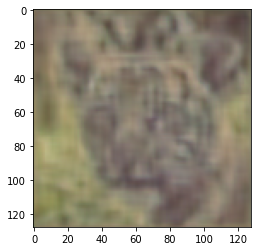

In [17]:
plt.imshow(model.predict(data_train[0].reshape(1,128,128,3)).reshape(128,128,3))

In [18]:
encoder = Model(model.layers[0].input,model.layers[8].output)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
def similarity(data,image):
  image = image.reshape(1,128,128,3)

  latent_rep_data = encoder.predict(data).reshape(-1,65536)
  latent_rep_image = encoder.predict(image).reshape(1,65536)
  img_sim_ratio = cosine_similarity(latent_rep_data,latent_rep_image)
  img_sim_ratio = list(enumerate(img_sim_ratio))
  img_sim_ratio_sorted = sorted(img_sim_ratio,reverse=True,key=lambda x: x[1],)
  img_index = [i[0] for i in img_sim_ratio_sorted]
  img_index = img_index[:10]

  plt.figure(figsize=(25,25))
  t=1
  for i in img_index:
    plt.subplot(5,2,t)
    plt.imshow(data[i])
    t+=1
  plt.show()  

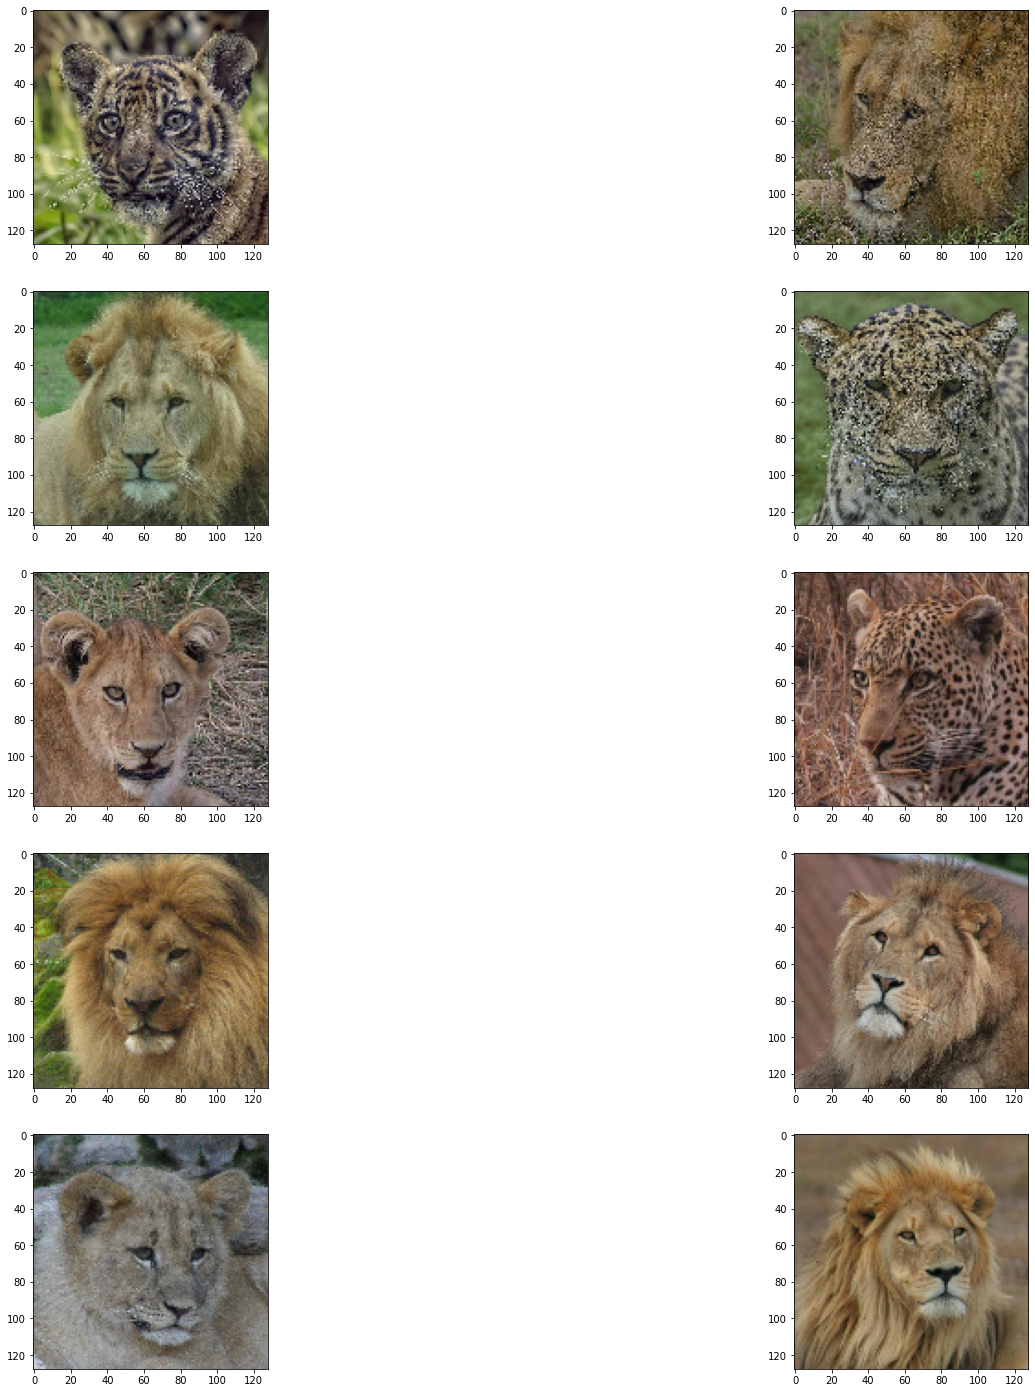

In [26]:
img_sim_ratio_sorted = similarity(data,data_train[0])

In [25]:
len(img_sim_ratio_sorted)

TypeError: ignored

In [ ]:
sorted_img_sim = sorted(img_sim_ratio_sorted,reverse=True,key=lambda x: x[1],)

In [ ]:
image_index = [i[0] for i in sorted_img_sim][:10]

In [ ]:
len(image_index)

In [ ]:
plt.figure(figsize=(25,25))
t=1
for i in image_index:
  plt.subplot(4,3,t)
  plt.imshow(data[i])
  t+=1
plt.show()  
